# 1. Diffusion-limited aggregation

In [92]:
import random
import numpy as np
import matplotlib.pyplot as plt


def initialize_particles(grid_size, num_liquid_particles, seed_grid_size, seed_number):
    '''This function initializes:
       1. Grid of liquid particles (all 0s)
       2. Initial position of liquid particles 
       3. Grid of solid particles with seed at the center'''
    
    #liquid
    liquid_grid = np.zeros(num_liquid_particles)
    initial_positions = np.random.randint(0, grid_size, size=(num_liquid_particles, 2))
    
    #solids
    solid_grid = np.zeros((grid_size, grid_size))
    #place seed
    if seed_number != 0:
        seed_grid = [grid_size//2-seed_grid_size//2, grid_size//2+seed_grid_size//2]
        seedX = np.random.randint(seed_grid[0], seed_grid[1], size=seed_number)
        seedY = np.random.randint(seed_grid[0], seed_grid[1], size=seed_number)
        
        solid_grid[seedX, seedY]=1
    s_initial_pos = np.where(solid_grid==1)
    
    
    return initial_positions, liquid_grid, s_initial_pos, solid_grid

In [109]:
def Diffusion_limited(initial_position, solid_positions, nSteps, liquid_grid, grid_size, solid_grid, num_particles, plot=True, freq=500):
    '''This function evolves liquid particles by:
       1. Take initial position of liquid particles
       2. Evolve posotion at every step by random jumps
       3. Consider liquid_grid to determine which particles move
       4. Plot evolution every few steps'''
    

    solids = 0
    pos0 = np.copy(initial_position)

    
    #keep track of trajectories
    l_trajectories = np.empty((nSteps, num_particles, 2))
    l_distance = []
    n = grid_size 
    
    
    for step in range(1,nSteps):
        
        dist = np.linalg.norm(initial_position - pos0)
        l_distance.append(dist)
        l_trajectories[step] = initial_position 
        
        
        #mask for particles that can still move
        #move_mask = liquid_grid == 0
        
        
        #mask for particles that will jump
        #50% probability
        jump_r = np.random.random(size=num_particles) < 0.5

        
        #random displacement
        #between -1,0,1 in x and y directions
        displacement = np.random.randint(-1, 2, size=(num_particles, 2))
        
        
        #displacement = 0 if NOT jumping
        displacement[~jump_r] = 0

        
        #make sure that if x=0, y!=0 and x!=0 if y=0
        #zero_x = displacement[:, 0] == 0
        #zero_y = displacement[:,1] == 0
        
        #where both are 0
        #zero_x_zero_y = zero_x & zero_y
        
        #randomly change one of the directions
        #random_change_dim = np.random.choice([0, 1], size=num_particles)
        #displacement[zero_x_zero_y, random_change_dim[zero_x_zero_y]] = np.random.choice([-1, 1], size=np.sum(zero_x_zero_y))
      
    
        
        #update positions
        new_positions = initial_position + displacement
        
        
        #apply periodic boundary conditions
        #new_positions = np.clip(new_positions, 0, grid_size -1)
        new_positions %= grid_size
        
    
        
        #check for particles NEXT to solids and stop their movement
        
        initial_position = new_positions
        
        
        for i in range(num_particles):
            
            if liquid_grid[i] == 0:
                #only update positions of particles that move
                x, y = initial_position[i]
                
                
                #solidify
                if (solid_grid[(x+1)%n,y]==1 or solid_grid[(x-1)%n, y]==1 or 
                    solid_grid[x, (y+1)%n]==1 or solid_grid[x, (y-1)%n]==1 or
                    #diagonal 
                    solid_grid[(x+1)%n, (y-1)%n]==1 or solid_grid[(x+1)%n, (y+1)%n]==1 or
                    solid_grid[(x-1)%n, (y-1)%n]==1 or solid_grid[(x-1)%n, (y+1)%n]==1): 

                    liquid_grid[i] = 1
                    solid_grid[x,y] = 1 #new solid!
                    solids += 1
            
        
        if step%freq==0:
            solid_positions = np.argwhere(solid_grid==1)
            plt.scatter(initial_position[:,0], initial_position[:,1], marker='.',s=3, color='lightblue')
            #plt.show()
            plt.scatter(solid_positions[:,0], solid_positions[:,1], marker='.', s=2)
            plt.title('Liquid particles at dt = ' + str(step))
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid(linestyle='--')
            plt.show()
        
        
    #plot trajectories
    if plot : 
        plt.plot(np.arange(nSteps), l_trajectories[:,:,0], '.', label='in x')
        plt.title('Particle trajectories in x')
        plt.xlabel('Steps')
        plt.ylabel('x')
        plt.show()
        plt.plot(np.arange(nSteps), l_trajectories[:,:,1], '.', label='in y')
        plt.title('Particle trajectories in y')
        plt.xlabel('Steps')
        plt.ylabel('y')
        plt.show()
        #plt.plot(l_trajectories[:,:,0], l_trajectories[:,:,1], '.', label='in y')
        #plt.title('Particle trajectories in y')
        #plt.xlabel('Steps')
        #plt.ylabel('y')
        #plt.show()

        plt.plot(np.arange(nSteps-1), np.array(l_distance), '.')
        plt.title('Distance from original position')
        plt.xlabel('Steps')
        plt.ylabel('Distance')
        #plt.plot(np.arange(nSteps), 80*(np.sqrt(np.arange(nSteps))))
        plt.show()

            
    return solids
    #return initial_positions

### (a) Model liquid particles

To demosntrate how the algorithm works and to show the evolution of liquid particles **only**, generate a 200x200 grid with 1000 liquid particles and 0 solid particles. 

The evolution code runs for 2000 time steps, plotting the particle distribution on the grid at certain step intervals. 

At the end, I show the x and y particle trajectories, as well as the distance from starting position as a function of steps. 

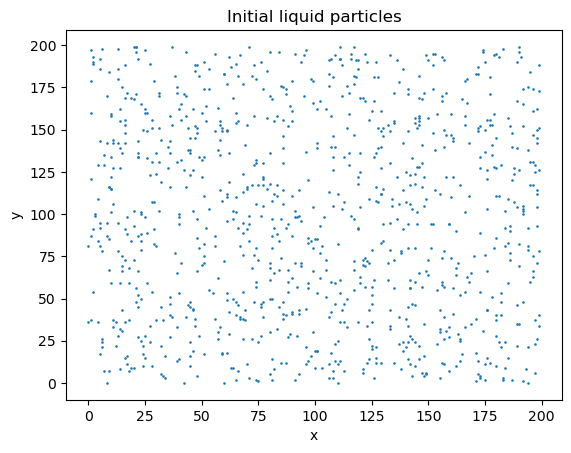

In [52]:
liquid_pos_i, l_grid, solid_pos_i, s_grid = initialize_particles(200,1000,0, 0)
#print(l_grid)
#print('\n')
#print(s_grid)

#plot initial conditions
plt.scatter(liquid_pos_i[:,0], liquid_pos_i[:,1], marker='.', s=3)
plt.title('Initial liquid particles')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

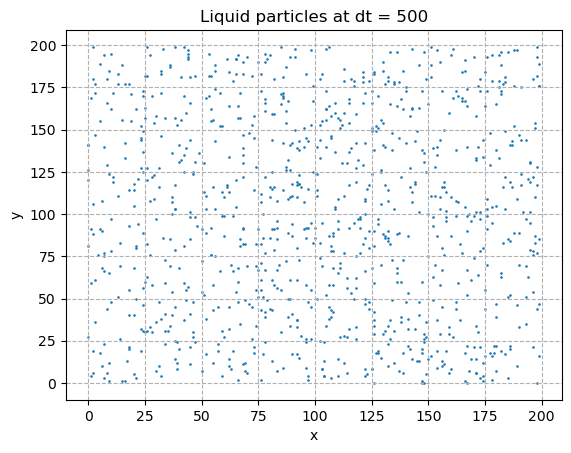

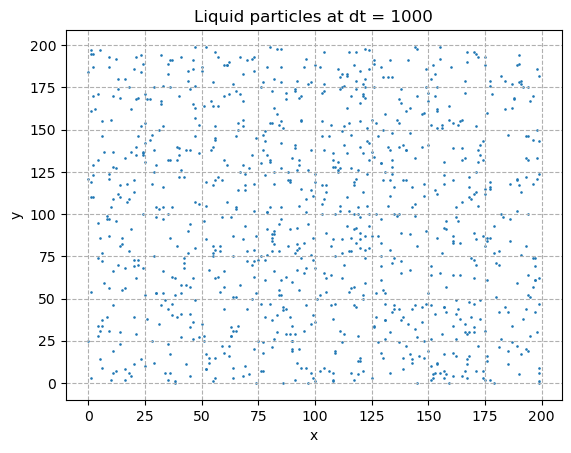

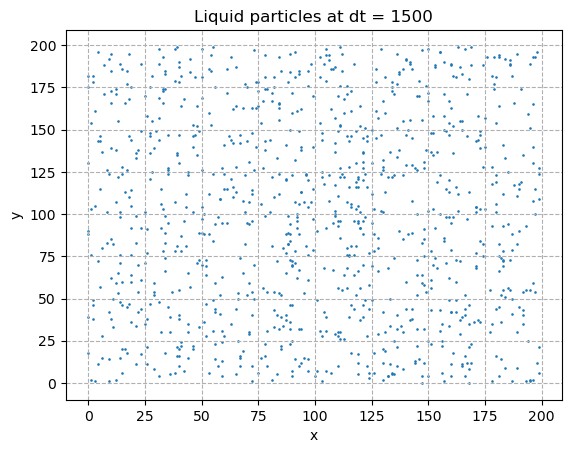

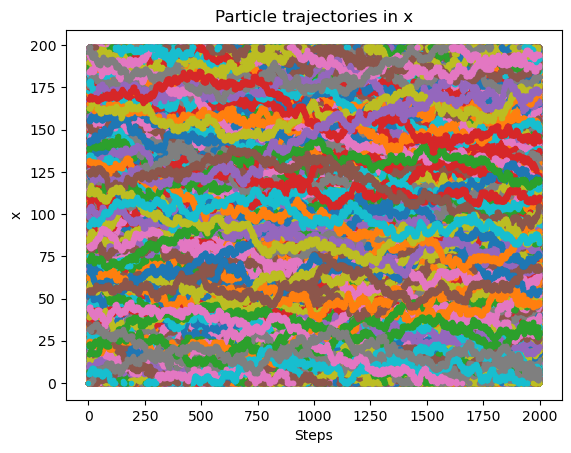

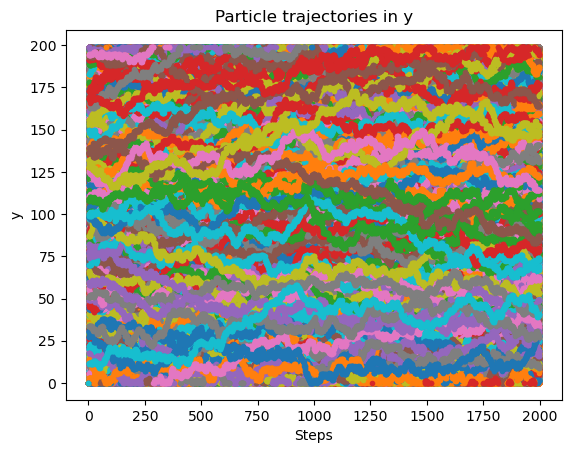

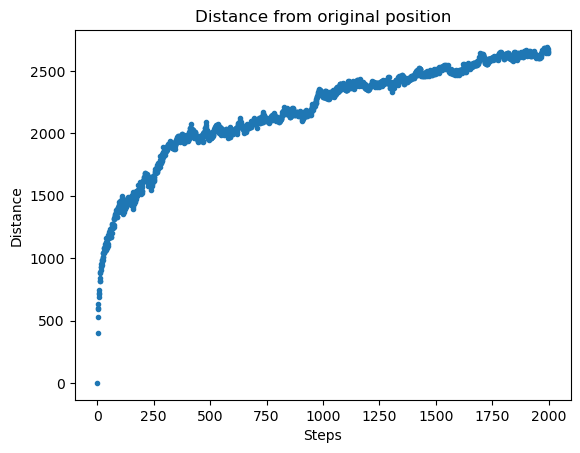

0

In [5]:
#call evolution function
Diffusion_limited(liquid_pos_i, solid_pos_i, 2000, l_grid, 200, s_grid, 1000, True, 500)

**How does distance from starting position depend on time (steps)?** 
The distance from starting position follows a ~$\sqrt{N}$, where N is the number of steps. 


**Expected for a random walk?**
Yes, this is what you expect from a random walk, typical behaviour for "diffusion phenomena", exactly what we are dealing with as the liquid particles evolve in the absence of any interaction or external forces. 

### (b) Add solid particles

In this case, generate a 200x200 grid with $10^4$ liquid particles and a small seed of solid particles in the center.

Run the Diffusion_limited function one time step at a time, and running it until we reach 80% of solid particles. 


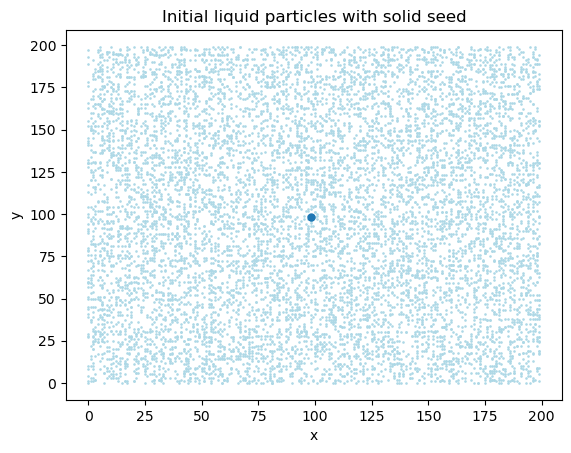

In [110]:
# First, generate grids
N_liquid_i = 10000

#start with 4 solid particles as seed 
liquid_pos_i, l_grid, solid_pos_i, s_grid = initialize_particles(200, N_liquid_i, 5, 1)


plt.scatter(liquid_pos_i[:,0], liquid_pos_i[:,1], marker='.',s=3, color='lightblue')
plt.scatter(solid_pos_i[0], solid_pos_i[1], marker='.',s=100)
plt.title('Initial liquid particles with solid seed')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Solid particles =  0
Liquid particles =  10000


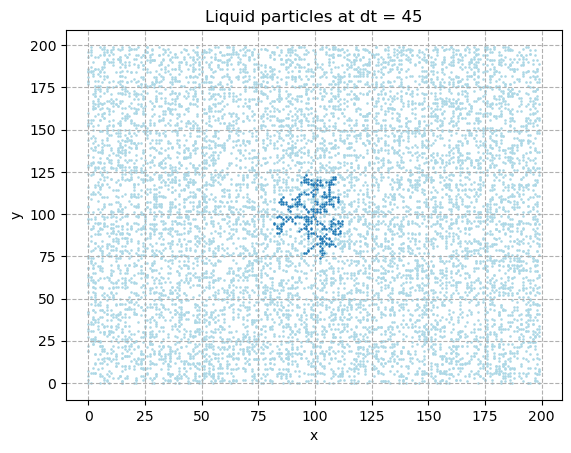

Solid particles =  346
Liquid particles =  9654


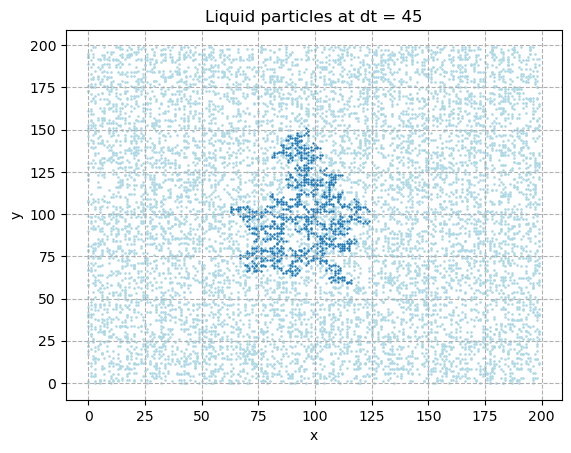

Solid particles =  955
Liquid particles =  9045


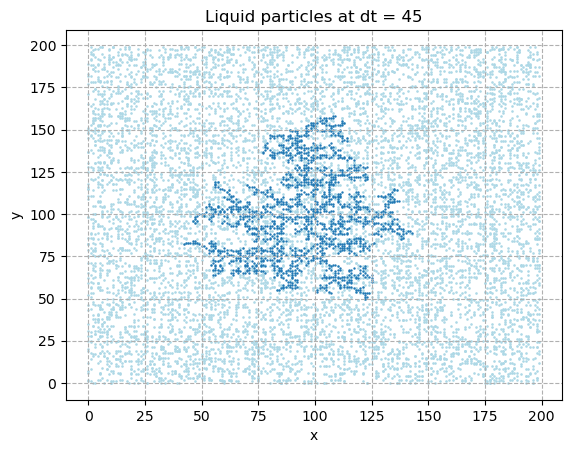

Solid particles =  1692
Liquid particles =  8308


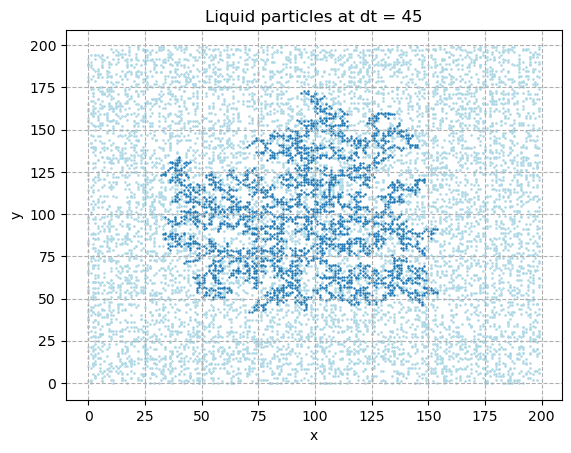

Solid particles =  2894
Liquid particles =  7106


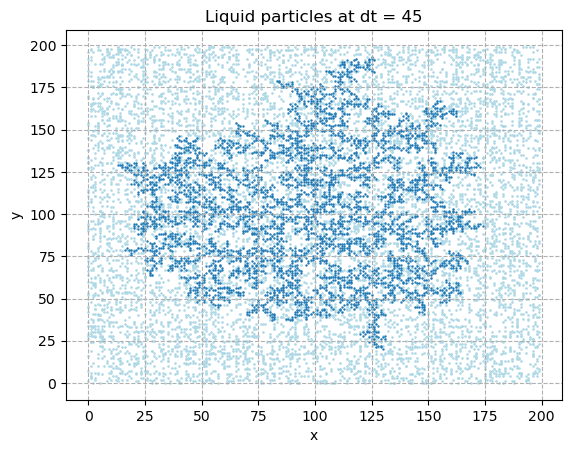

Solid particles =  4504
Liquid particles =  5496


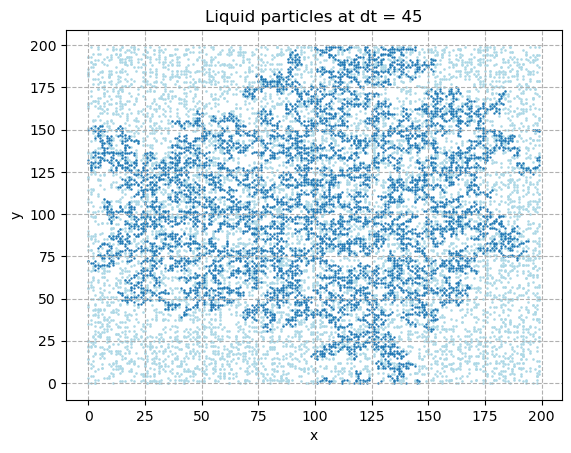

Solid particles =  6573
Liquid particles =  3427


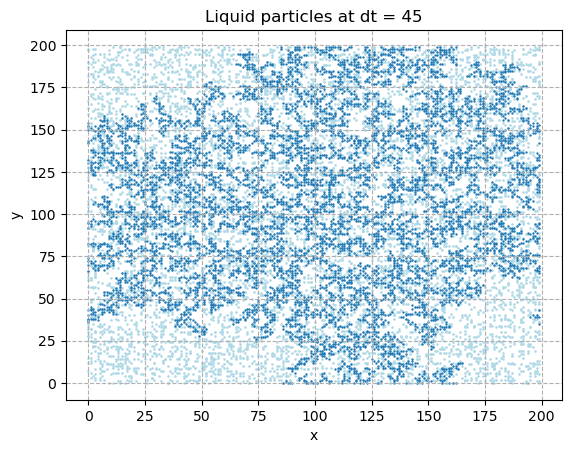

Solid particles =  7985
Liquid particles =  2015


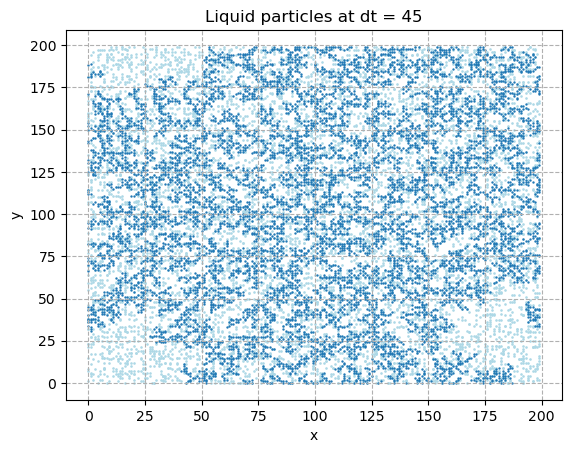

In [111]:
#call function

#initialize new number of solids
solid_history = []
solids = 0 
liquids = N_liquid_i 
t = 0


while (solids/N_liquid_i)*100 < 80: 
    print('Solid particles = ', solids)
    print('Liquid particles = ', liquids)
    #run algorithm for 4 time steps every time such that dt = 4
    solids += Diffusion_limited(liquid_pos_i, solid_pos_i, 50, l_grid, 200, s_grid, N_liquid_i, False, 45)
    liquids = N_liquid_i - solids
    solid_history.append(solids)
    t += 45

### (c) Number of solid particles as a function of time

Text(0, 0.5, 'Number of solid particles')

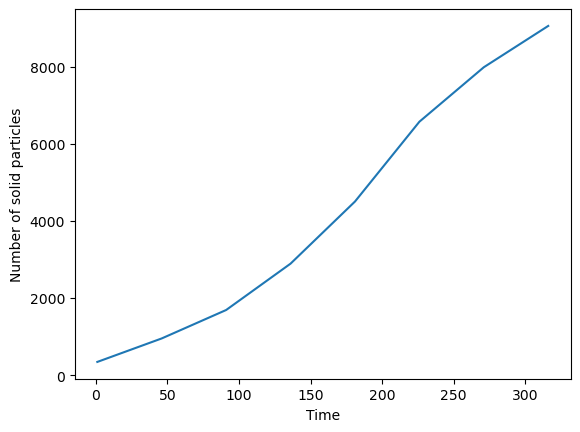

In [128]:
# number of solid particles as a function of time
time = np.arange(1, t, 45)
#print(time)
plt.plot(time, solid_history)
plt.xlabel('Time')
plt.ylabel('Number of solid particles')

**How can you understand this based on how particles evolve in (a)?**

From the plot above, the number of solids $N_{solids}$ behaves as t^2 (a quadrtic function) with increasing time, which makes sense based on the baheviour explored in (a). Liquid particles evolve in distance as $\sqrt(N)$  from their original position. These are inverse functions!

Let's explain this in a bit more detail:

We have a small solid seed that starts growing rapidly when surrounded by liquid particles at the center of the grid. As liquid particles evolve and move further away from their original position, they reach a stable distance, and the number of solid particles also seems to reach a plateau. This means that it will reach a steady growth rate at later time steps as liquid particles are more scarcely spread. 

# 2. Ising model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

#random generator
seed = 239
rng = np.random.default_rng(seed)

def prob_distr(E, kb_T):
    return np.exp(-E/kb_T)

In [6]:
# define necessary functions

def total_E(spins):
    '''Compute energy E of spin lattice
       Sum of every spin pair (up, down, left, right)
       
       This function iterates over every spin 
       and imposes periodic boundary conditions'''
    
    E = 0 
    N = len(spins)
    for i in range(N):
        for j in range(N):
            # consider spins up, down, left, right of (i,j)
            boundary = spins[(i+1)%N, j] + spins[(i-1)%N, j] + spins[i,(j+1)%N]  +  spins[i,(j-1)%N]
            E += -boundary*spins[i,j]/2 
    return E


def delta_E(spins, i, j):
    '''Compute change in energy after the flipping of a spin at (i,j)'''
    N = len(spins)
    boundary = spins[(i+1)%N, j] + spins[(i-1)%N, j] + spins[i,(j+1)%N]  +  spins[i,(j-1)%N]
    dE = 2*spins[i,j]*boundary
    
    return dE

### (a) Write Metropolis-Hastings algorithm
#### Generate sample of configurations from given probability distribution

**Algorithm**: The algorithm written below "chooses" a random (i,j) spin on a spin lattice, calculates the change in energy that would result from flipping that spin and either accepts or rejects the flip. The code also saves the total magnetization at every change of the spin lattice. 

Text(0, 0.5, 'Total Magnetization M')

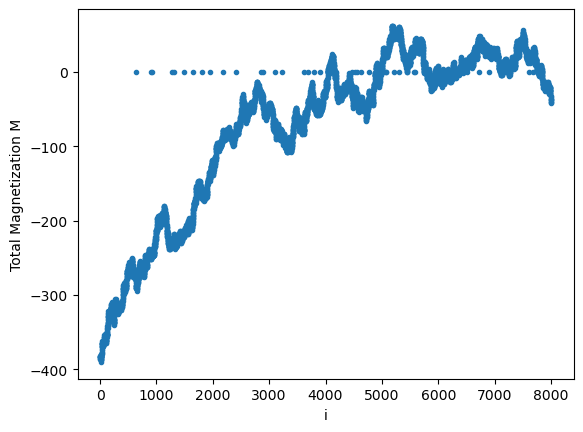

In [9]:
def MH_IsingModel(spin_lattice, N, N_steps, kb_T):
    '''Implemnentation of Metropolis Hastings algorithm for 
       Ising model
       Takes as input a 2D spin lattice
       
       Runs for N_steps number of steps'''
    
    spins = spin_lattice.copy()
    count = 0

    #save history of total magnetization
    M_chain = np.zeros(N_steps) 
    
    #initial total energy and magnetization
    #M_T = np.sum(spins) 
    #E_T = total_E(spins)
     
    #save evolution of spin lattice
    S = []
    
    #Metropolis Hastings
    for step in range(0, N_steps):
    
        #pick a random spin in lattice
        i, j = np.random.randint(0,N), np.random.randint(0,N)
        
        #spin_old = spins[i,j]
        
        #compute energy change from a spin flip at (i,j)
        dE = delta_E(spins, i, j)
    
        #accept or reject proposal
        if dE <=0 or (np.random.random() < np.exp(-dE/kb_T)):
            #flip spin
            spins[i,j]  *= -1
            #change total energy of lattice
            #E_T += dE 
            #change total magnetization
            #M_T = np.sum(spins)
            M_chain[step] = spins.sum()
            
            count += 1
            
        else:
            continue #nothing changes
    
        #save data
        #M.append(M_T) #total magnetization
        #E.append(E_T) #total energy
        S.append(spins.copy()) #spins
        
    return np.array(S), M_chain, count


#call algorithm
TRoom = 293 #K
kb = 1.380e-23 #J K^-1 
N = 50 #size of lattice

#set up nxn lattice
#give some weights to the random choices
s = np.random.choice([-1, 1], size=(N,N), p=[0.60, 0.40])

#call algorithm
S, M_chain, counts = MH_IsingModel(s, N , 8000, TRoom)

plt.plot(np.arange(8000), M_chain, '.')
plt.xlabel('i')
plt.ylabel('Total Magnetization M')

**Observations**:

- Total magnetizations converges to 0. This makes sense, as the spin lattice reaches some type of "equilibrium" all spin up's and down's cancel out, reaching M=0.


- Notice some points at which magnetization M is exactly 0. While this exact average can happen when we have equal number of spin up and spin downs, we might be able to get rid of this behavior by extending the size of the grid. 


- The code might be sensitive to the original spin lattice; the total magnetization might not converge for some configurations of spin. However, all I have tried seem to converge to 0, as expected. 


### (b) Run metropolis-Hastings at different temperatures

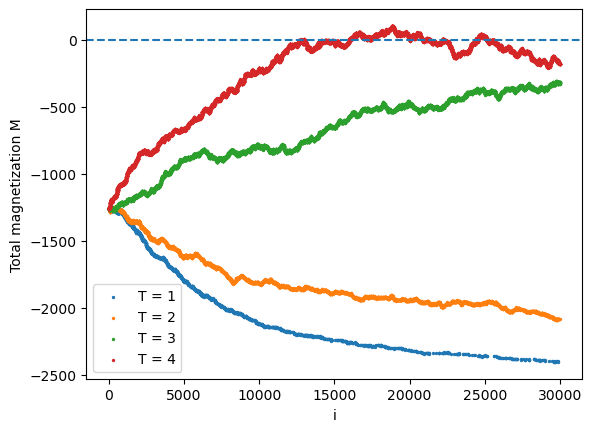

In [247]:
# make plot of M chains against iteration number

#define spin lattice again
s = np.random.choice([-1, 1], size=(N,N), p=[0.75, 0.25])

kb_Ts = np.arange(1,5)
M_chains = []
for kT in kb_Ts: 
    #call the algorithm
    S, M, counts = MH_IsingModel(s, 50, 30000, kT)
    M_chains.append(M)
    plt.scatter(np.arange(30000)[np.argwhere(M!=0)], M[np.argwhere(M!=0)], label = 'T = '+str(kT), s=2)
    plt.xlabel('i')
    plt.ylabel('Total magnetization M')
    plt.legend()
plt.axhline(y=0, linestyle='--')

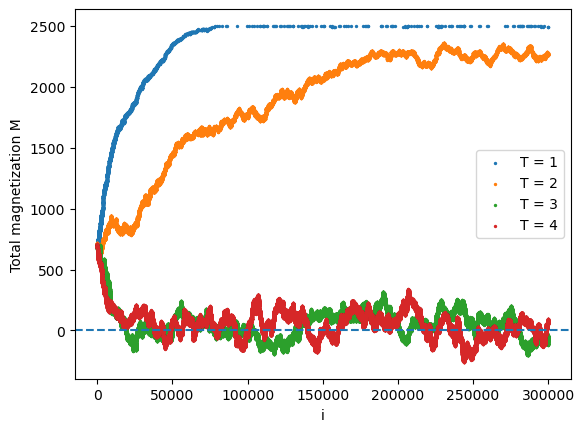

In [49]:
# try a different starting configuration

s = np.random.choice([-1, 1], size=(N,N), p=[0.35, 0.65])

kb_Ts = np.arange(1,5)
M_chains = []
for kT in kb_Ts: 
    #call the algorithm
    S, M, counts = MH_IsingModel(s, 50, 300000, kT)
    M_chains.append(M)
    plt.scatter(np.arange(300000)[np.argwhere(M!=0)], M[np.argwhere(M!=0)], label = 'T = '+str(kT), s=2)
    plt.xlabel('i')
    plt.ylabel('Total magnetization M')
    plt.legend()
plt.axhline(y=0, linestyle='--')

Do we see a "burn-in" phase?

Yes! There is a burn-in phase whre the samples in the Metropolis-Hastings algorithm have yet to "find" their appropriate trend to reach equilibrium. 

I do see very drastically different behaviours between low and high temperatures! 

Notice for higher temperatures (T = 3, 4), the system is evolving towards a total magnetization of 0. This means that it is reaching an equal number of up and down spins. On the other hand, at lower temperatures (T = 1, 2), the system is evolving towards a state of maximum magnetization (either positive or negative). This tells us that the spins are either all becoming up (summing to a positive maximum M) or all becoming down (summing to a negative "maximum" M). This is due to a phase transition.

All spins aligned in the same direction is known as ferromagnetism, which occurs at lower temperatures, but specific to each material. 

### (c) Mean magnetization and Variance

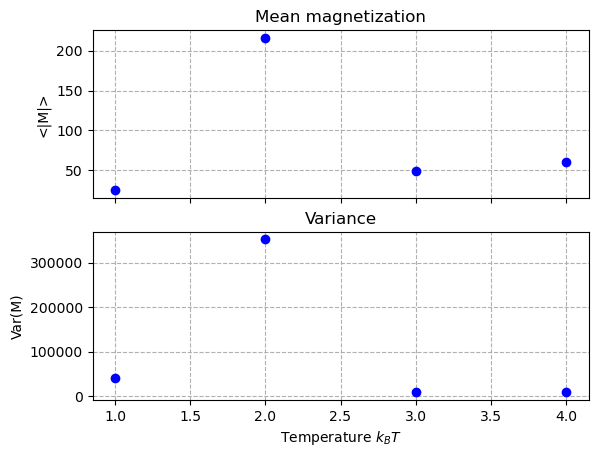

In [50]:
# Mean magnetization and variance as a function of temperature

#kb_Ts = np.linspace(0.5, 5 , 10)

fig, axs = plt.subplots(2, sharex=True)

for i, k in enumerate(kb_Ts):
    #make a new lattice every time
    #s = np.random.choice([-1, 1], size=(N,N), p=[0.65, 0.35])
    
    #M = MH_IsingModel(s, 50, 20000, k)[1]
    #plt.scatter(np.arange(30000)[np.argwhere(M!=0)], M[np.argwhere(M!=0)], label = 'T = '+str(kT), s=2)
    axs[0].plot(k, np.mean(np.abs(M_chains[i])), 'o', color='b')
    axs[0].set_title('Mean magnetization')
    axs[0].set_ylabel('<|M|>')
    axs[0].grid(linestyle='--')
    
    axs[1].set_xlabel('Temperature $k_{B}T$')
    axs[1].plot(k, np.var(M_chains[i]), 'o', color='b')
    axs[1].set_title('Variance')
    axs[1].set_ylabel('Var(M)')
    axs[1].grid(linestyle='--')
    
    

Variance is a measure of the spread in data points. In the plot above, we can see that the lower temperature points (T= 1,2) have a larger variance than the points corresponding to higher temperatures. In particular T=2 has a much larger variance exactly at the point of higher mean magnetization. This is indicative of a second order phase transition as we previously discussed, where all spins are aligned reaching a maximum magnetization value. 